Experiment 1 with IAM dataset
============================================

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
import time
import os
from utils import *
from classes import *

use_gpu = torch.cuda.is_available()

print('main imports complete')

main imports complete


In [2]:
# ========================================
# Step 1. define data transform
#
# Including different forms of data augmentation
# One will include nearly all types (excluding random crops, etc. that may remove handwriting.)
# The other will include a selected set of augmentations
# Keeping 'train', 'val', and 'test' transforms just in case we want to include different functionalities
# ========================================

# Need the __name__ check to make multiprocessing work on Windows for some reason
# if __name__ == '__main__':
print("Set up data transforms.")
img_input_size = 56

selected_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # RandomRotation does not seem to be working on Windows right now
        transforms.RandomRotation(45),

        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5),
        transforms.RandomGrayscale(p=0.1),

        transforms.Grayscale(), # not sure why the current input is not grayscale, do grayscale conversion
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    # should not do random transformation in val or test set
    'val': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
}

net1_data_transforms = {
    'train': transforms.Compose([
#         transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

# data_transforms = selected_transforms
data_transforms = net1_data_transforms


Set up data transforms.


In [3]:
all_data_dir = '/home/rahul/data/handwriting/sampled/dim64x64-stride8x8/train_val_test-3'
set_types = ['train', 'val', 'test']

imagefolders = {t : datasets.ImageFolder(os.path.join(all_data_dir, t),
                                        transform = data_transforms[t])
               for t in set_types}
for t in set_types:
    print(str(t) + ' count:', len(imagefolders[t]))

train count: 7723
val count: 3478
test count: 2115


device_name cuda
Creating Net1.

Epoch 0/99
----------
Phase:train
average loss: 0.3200421148838041
f1_pos: 0.8652463382157123
f1_neg: 0.8724798387096775

Phase:val
average loss: 1.604378842841352
f1_pos: 0.6067369291175863
f1_neg: 0.10108644307982993


Epoch 1/99
----------
Phase:train
average loss: 0.1760222842138071
f1_pos: 0.9294956429891734
f1_neg: 0.9321646341463414

Phase:val
average loss: 0.5051755237812418
f1_pos: 0.7497227356746764
f1_neg: 0.8407433545048223


Epoch 2/99
----------
Phase:train
average loss: 0.1588665795622597
f1_pos: 0.9374174808555585
f1_neg: 0.9397865853658536

Phase:val
average loss: 0.5006500110330082
f1_pos: 0.8531211750305998
f1_neg: 0.8698481561822127


Epoch 3/99
----------
Phase:train
average loss: 0.1514887446784825
f1_pos: 0.9400079459674215
f1_neg: 0.9426219126029132

Phase:val
average loss: 0.7471582400791943
f1_pos: 0.8356915968813169
f1_neg: 0.8371027769825364


Epoch 4/99
----------
Phase:train
average loss: 0.14936523226688025
f1_pos: 0.93985

Phase:train
average loss: 0.09717231059586093
f1_pos: 0.95932382461701
f1_neg: 0.9608839217678435

Phase:val
average loss: 0.6035917692139204
f1_pos: 0.8156836461126005
f1_neg: 0.8615307150050352


Epoch 38/99
----------
Phase:train
average loss: 0.10783964571489134
f1_pos: 0.9495619856649855
f1_neg: 0.9519716885743175

Phase:val
average loss: 1.9075642262744519
f1_pos: 0.6366013071895426
f1_neg: 0.29501267962806427


Epoch 39/99
----------
Phase:train
average loss: 0.10022875793286899
f1_pos: 0.9573934837092731
f1_neg: 0.9589319771137954

Phase:val
average loss: 1.591476816497636
f1_pos: 0.39554612937433725
f1_neg: 0.7751479289940829


Epoch 40/99
----------
Phase:train
average loss: 0.0968310470452476
f1_pos: 0.9599788667283055
f1_neg: 0.9615238095238096

Phase:val
average loss: 1.0821250539665046
f1_pos: 0.8363636363636364
f1_neg: 0.8375823546261815


Epoch 41/99
----------
Phase:train
average loss: 0.09506402419288897
f1_pos: 0.9579698651863601
f1_neg: 0.9596446700507615

Phase:val

Phase:train
average loss: 0.08118379432585023
f1_pos: 0.9621292372881357
f1_neg: 0.963769951862174

Phase:val
average loss: 0.8872627489795761
f1_pos: 0.7037037037037038
f1_neg: 0.8240146654445463


Epoch 75/99
----------
Phase:train
average loss: 0.08228813551214867
f1_pos: 0.9637949260042282
f1_neg: 0.9652195988829652

Phase:val
average loss: 3.6488935589584695
f1_pos: 0.18673218673218675
f1_neg: 0.7515015015015014


Epoch 76/99
----------
Phase:train
average loss: 0.08421876858406142
f1_pos: 0.9620119126406353
f1_neg: 0.9636294512736029

Phase:val
average loss: 0.757707657966208
f1_pos: 0.8399624177889131
f1_neg: 0.8642040924794048


Epoch 77/99
----------
Phase:train
average loss: 0.07895142974692058
f1_pos: 0.9658266262039846
f1_neg: 0.9670776662005847

Phase:val
average loss: 0.6631458525927743
f1_pos: 0.8543505674653216
f1_neg: 0.8779069767441862


Epoch 78/99
----------
Phase:train
average loss: 0.0810938092296171
f1_pos: 0.9591944886062533
f1_neg: 0.9610027855153204

Phase:val

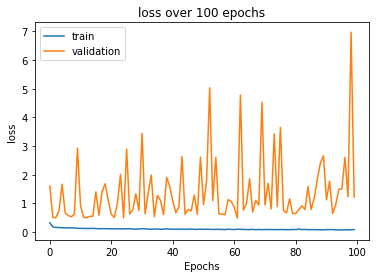

Average Training Score: 0.10089493842052168
Average Validation Score: 1.3707909669315357


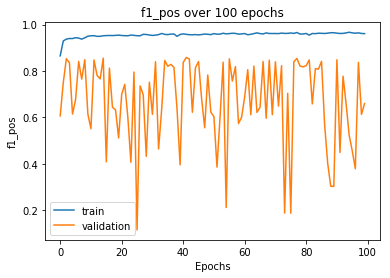

Average Training Score: 0.9561595993324046
Average Validation Score: 0.6716430439347951


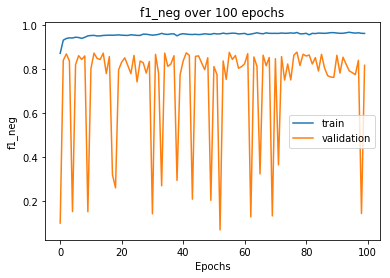

Average Training Score: 0.9579376423660818
Average Validation Score: 0.7288019784925623
Wrote metrics to 'net1-IAM-aa_64-raw_logs/all_metrics.csv'



In [4]:
from model_utils import create_model_architecture
from train_utils import train

use_gpu = True
device_name = 'cuda' if use_gpu else 'cpu'
print('device_name', device_name)

batch_size = 100

phases = ['train', 'val']
metric_types = ['loss', 'tn', 'fp', 'fn', 'tp', 'f1_pos', 'f1_neg']
metric_types_plot = ['loss', 'f1_pos', 'f1_neg']
metric_names_all = [p+'-'+m for p in phases for m in metric_types]
metric_names_plot = [p+'-'+m for p in phases for m in metric_types_plot]

all_metrics = {metric : [] for metric in metric_names_all}

num_training_epochs = 100

data_loaders = {t : torch.utils.data.DataLoader(imagefolders[t], batch_size = batch_size, shuffle = True, num_workers = 4)
                for t in phases}

model = create_model_architecture('net1', use_gpu = use_gpu)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, train_metrics = train(model,
                                     criterion,
                                     optimizer,
                                     data_loaders['train'],
                                     data_loaders['val'],
                                     num_epochs=num_training_epochs,
                                     use_gpu = use_gpu)

all_metrics = train_metrics

for metric in metric_types_plot:
    plot_values(all_metrics['train-' + str(metric)],
               all_metrics['val-' + str(metric)],
               str(metric) + " over " + str(num_training_epochs) + " epochs",
               ylabel = str(metric))

# write metrics to file
# write_metrics_to_csv(all_metrics, metric_names_all, 'net1-IAM-aa_64-raw_logs', 'all_metrics.csv')

print()


In [6]:
# write metrics to file
write_metrics_to_csv(all_metrics, metric_names_all, 'net1-aa_64-raw_logs', 'all_metrics.csv')
torch.save(trained_model.state_dict(), 'models/net1-aa_64-1.pt')

Wrote metrics to 'net1-aa_64-raw_logs/all_metrics.csv'


In [ ]:

# import sys
# import os
# sys.path.append(os.path.abspath('../../../'))
# from detection.lib.model.ImageROI import ImageROI
# from PIL import Image

# # book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# # img_loc = book_data_dir + '/Dryden/positive/307.png'
# # Testing with image of dimensions 1000x1381

# img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
# pilimg = Image.open(img_loc)
# w, h = pilimg.size
# imgrois = [ImageROI(0, 0, w, h)]
# imgarr = np.asarray(pilimg)

# from bounding_box_classification import get_pos_rois
# # net1 = Net1()

# # Modify this as necessary
# # imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
# trained_model.train(False)
# with torch.set_grad_enabled(False):
#     pos_rois = get_pos_rois(trained_model,
#                             (pilimg, imgrois),
#                             model_transform = net1_data_transforms['test'],
#                             model_input_size = (64,64),
#                             stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
# all_rois = [roi for rois in pos_rois for roi in rois]
    
# print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
# from detection.lib.utils.Utils import plt_img
# # plot the rois and plot only certain information according to the set
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
# plt_img(imgarr, rois=all_rois, roi_level_set=roi_level_set)

In [ ]:

# import sys
# import os.path
# sys.path.append(os.path.abspath('../../../'))


# # from detection.lib.ImgProcessor import ImgProcessor
# import matplotlib.pyplot as plt
# import numpy as np
# from detection.lib.utils.Utils import *
# from detection.lib.OCREngine import OCREngine
# import pickle

# from PIL import Image

# # 1. parameters
# # root_dir = './sample'
# # img_id = '639'
# # fname = '%s.png' %img_id
# # ocr_engine = 'cv2'
# # f = '%s/%s' % (root_dir,fname)

# ocr_engine = 'tesseract'
# img_id = '1307'
# fname = '1307.png'
# f = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'

# # 2. Load the image
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=f)
# img = np.asarray(Image.open(f))

# # 3. preprocess the image
# # img = imgProcessor.quickPreprocess(img)

# # 4. load the image ground truth
# # img_roi_ground_truth = all_ground_truth[img_id]

# # 5. define the OCR
# # define engine
# ocr = OCREngine(ocr_engine)
# img_roi_ocr, data_df = ocr.image_to_data(img)

# # plot the rois and plot only certain information according to the set
# # roi_level_set = set([2])
# # rois = [(img_roi_ground_truth,'b'), (img_roi_ocr,'r')]
# rois = [(img_roi_ocr,'r')]
# plt_img(img, rois=rois)#, roi_level_set=roi_level_set)

# # save the plot
# plt.savefig('./result/%s_%s_boxes.png' %(fname,ocr_engine))

# # save the bounding boxes to txt
# # save_rois(img_roi_ground_truth,'./result/%s_imgROIs_ground_truth.txt' %fname)
# save_rois(img_roi_ocr,'./result/%s_imgROIs.txt' %fname)

# # save the bounding boxes to pickle
# # with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
# #     pickle.dump({'ocr':img_roi_ocr, 'ground_truth':img_roi_ground_truth},f)

